In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

# Load dataset
file_path = "Car_sales.csv"
df = pd.read_csv(file_path)

# 1. Read top five values
print("Top 5 values:")
print(df.head())

Top 5 values:
    Manufacturer              Model  Sales in thousands 4-year resale value  \
0  Acura          Integra                        16.919               16.36   
1  Acura          TL                             39.384              19.875   
2  Acura          CL                             14.114              18.225   
3  Acura          RL                              8.588              29.725   
4  Audi           A4                             20.397              22.255   

  Vehicle type Price in thousands Engine size Horsepower Wheelbase Width  \
0    Passenger               21.5         1.8        140     101.2  67.3   
1    Passenger               28.4         3.2        225     108.1  70.3   
2    Passenger                  .         3.2        225     106.9  70.6   
3    Passenger                 42         3.5        210     114.6  71.4   
4    Passenger              23.99         1.8        150     102.6  68.2   

  Length Curb weight Fuel capacity Fuel efficiency Lat

In [3]:

# 2. Print dataframe info and data types of each column
print("\nDataFrame Info:")
print(df.info())


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales in thousands   157 non-null    float64
 3   4-year resale value  157 non-null    object 
 4   Vehicle type         157 non-null    object 
 5   Price in thousands   157 non-null    object 
 6   Engine size          157 non-null    object 
 7   Horsepower           157 non-null    object 
 8   Wheelbase            157 non-null    object 
 9   Width                157 non-null    object 
 10  Length               157 non-null    object 
 11  Curb weight          157 non-null    object 
 12  Fuel capacity        157 non-null    object 
 13  Fuel efficiency      157 non-null    object 
 14  Latest Launch        157 non-null    object 
dtypes: float64(1), object(1

In [4]:
# 3. Print number of rows and columns
print("\nNumber of rows and columns:")
print(df.shape)


Number of rows and columns:
(157, 15)


In [5]:
# 4. Drop duplicate rows (if any)
df = df.drop_duplicates()

In [6]:
# 5. Print number of rows and columns after dropping duplicates
print("\nNumber of rows and columns after dropping duplicates:")
print(df.shape)



Number of rows and columns after dropping duplicates:
(157, 15)


In [7]:

# 6. Print summary statistics for numerical variables
print("\nSummary statistics for numerical variables:")
print(df.describe())


Summary statistics for numerical variables:
       Sales in thousands
count          157.000000
mean            52.998076
std             68.029422
min              0.110000
25%             14.114000
50%             29.450000
75%             67.956000
max            540.561000


In [8]:
# 7. Print number of missing values in each column
print("\nNumber of missing values in each column:")
print(df.isnull().sum())


Number of missing values in each column:
Manufacturer           0
Model                  0
Sales in thousands     0
4-year resale value    0
Vehicle type           0
Price in thousands     0
Engine size            0
Horsepower             0
Wheelbase              0
Width                  0
Length                 0
Curb weight            0
Fuel capacity          0
Fuel efficiency        0
Latest Launch          0
dtype: int64


In [9]:
# 8. Drop the column with most missing values
most_missing = df.isnull().sum().idxmax()
df = df.drop(columns=[most_missing])
print(f"\nDropped column with most missing values: {most_missing}")



Dropped column with most missing values: Manufacturer


In [10]:

# 9. Drop rows with categorical missing values
df = df.dropna(subset=df.select_dtypes(include='object').columns)


In [15]:
for col in df.select_dtypes(include='number').columns:
    df[col] = df[col].fillna(df[col].mean())


In [17]:

# 11. Sort data w.r.t. price and find most/least expensive cars
df = df.sort_values(by='Price in thousands', ascending=False)
print("\nMost expensive car details:")
print(df.iloc[0])
print("\nLeast expensive car details:")
print(df.iloc[-1])


Most expensive car details:
Model                  Accent           
Sales in thousands                41.184
4-year resale value                 5.86
Vehicle type                   Passenger
Price in thousands                 9.699
Engine size                          1.5
Horsepower                            92
Wheelbase                           96.1
Width                               65.7
Length                             166.7
Curb weight                         2.24
Fuel capacity                       11.9
Fuel efficiency                       31
Latest Launch                   9-Oct-14
Name: 62, dtype: object

Least expensive car details:
Model                  CL               
Sales in thousands                14.114
4-year resale value               18.225
Vehicle type                   Passenger
Price in thousands                     .
Engine size                          3.2
Horsepower                           225
Wheelbase                          106.9
Width          

In [19]:

# 12. Write a function to find min and max values of any column
def find_min_max(column):
    return df[column].min(), df[column].max()

In [21]:

# 13. Call the function for horse power, length, and fuel efficiency
for col in ['Horsepower', 'Length', 'Fuel efficiency']:
    min_val, max_val = find_min_max(col)
    print(f"\nMin and Max of {col}: {min_val}, {max_val}")


Min and Max of Horsepower: ., 92

Min and Max of Length: ., 224.5

Min and Max of Fuel efficiency: ., 45


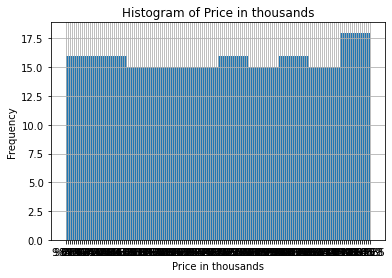

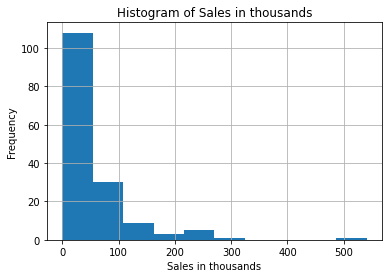

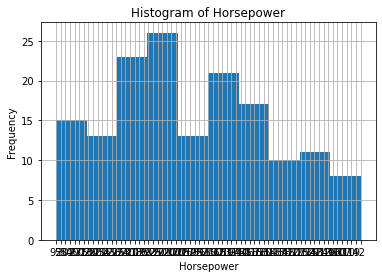

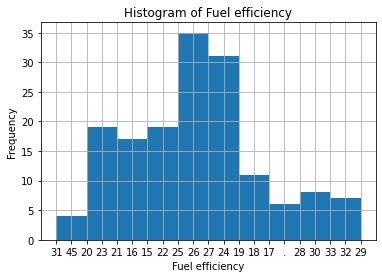

In [23]:
# 14. Plot histogram of continuous variables
continuous_vars = ['Price in thousands', 'Sales in thousands', 'Horsepower', 'Fuel efficiency']
for col in continuous_vars:
    plt.figure()
    df[col].hist()
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


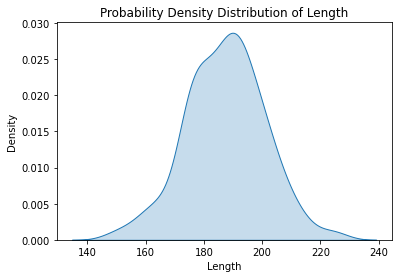

In [26]:
# Ensure 'Length' is numeric
df['Length'] = pd.to_numeric(df['Length'], errors='coerce')

# Drop rows with NaN in 'Length' (optional, if needed)
df = df.dropna(subset=['Length'])

# Probability density distribution of 'Length'
import matplotlib.pyplot as plt
import seaborn as sns

sns.kdeplot(df['Length'], fill=True)
plt.title("Probability Density Distribution of Length")
plt.xlabel("Length")
plt.ylabel("Density")
plt.show()


In [32]:
# 16. Count by category – group by manufacturer
# Count by category – group by Vehicle type
print("\nCount by Vehicle type:")
print(df.groupby('Vehicle type').size())



Count by Vehicle type:
Vehicle type
Car           40
Passenger    116
dtype: int64


In [30]:
print(df.columns)


Index(['Model', 'Sales in thousands', '4-year resale value', 'Vehicle type',
       'Price in thousands', 'Engine size', 'Horsepower', 'Wheelbase', 'Width',
       'Length', 'Curb weight', 'Fuel capacity', 'Fuel efficiency',
       'Latest Launch'],
      dtype='object')


In [31]:
print(df.head())


                 Model  Sales in thousands 4-year resale value Vehicle type  \
62   Accent                         41.184                5.86    Passenger   
26   Metro                          21.855                5.16    Passenger   
99   CL500                           0.954                   .    Passenger   
95   SL-Class                        3.311                58.6    Passenger   
126  Carrera Cabriolet               1.866               67.55    Passenger   

    Price in thousands Engine size Horsepower Wheelbase Width  Length  \
62               9.699         1.5         92      96.1  65.7   166.7   
26               9.235           1         55      93.1  62.6   149.4   
99                85.5           5        302     113.6  73.1   196.6   
95                82.6           5        302        99  71.3   177.1   
126              74.97         3.4        300      92.6  69.5   174.5   

    Curb weight Fuel capacity Fuel efficiency Latest Launch  
62         2.24         

In [33]:
# 17. Select all numerical variables
numerical_vars = df.select_dtypes(include='number')
print("\nNumerical variables:")
print(numerical_vars.columns)


Numerical variables:
Index(['Sales in thousands', 'Length'], dtype='object')


In [40]:
# 18. Print correlation coefficient of price and sales
# Ensure numeric conversion and handle errors
df['Price in thousands'] = pd.to_numeric(df['Price in thousands'], errors='coerce')
df['Sales in thousands'] = pd.to_numeric(df['Sales in thousands'], errors='coerce')

# Drop rows with NaN in the relevant columns
df.dropna(subset=['Price in thousands', 'Sales in thousands'], inplace=True)

# Calculate and print the correlation coefficient
correlation = df['Price in thousands'].corr(df['Sales in thousands'])
print("\nCorrelation coefficient of price and sales:", correlation)



Correlation coefficient of price and sales: -0.3047344541294123


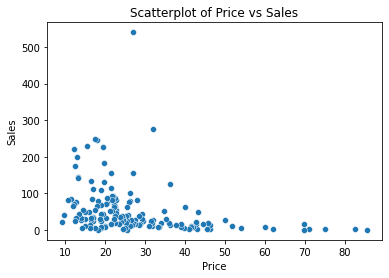

In [42]:
# 19. Scatterplot of price vs sales
sns.scatterplot(x='Price in thousands', y='Sales in thousands', data=df)
plt.title("Scatterplot of Price vs Sales")
plt.xlabel("Price")
plt.ylabel("Sales")
plt.show()


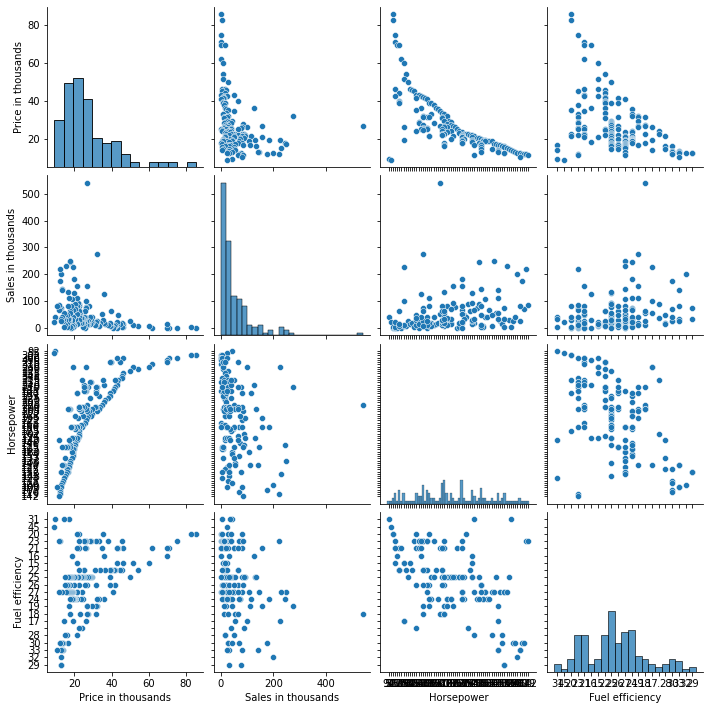

In [44]:
# 20. Pair plot
sns.pairplot(df, vars=['Price in thousands', 'Sales in thousands', 'Horsepower', 'Fuel efficiency'])
plt.show()

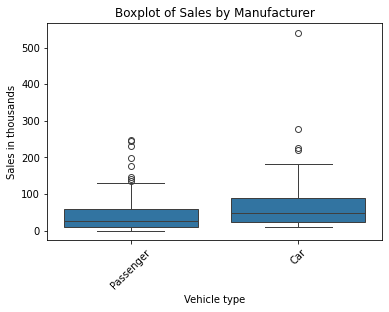

In [48]:

# 21. Boxplot of sales by manufacturer
sns.boxplot(x='Vehicle type', y='Sales in thousands', data=df)
plt.title("Boxplot of Sales by Manufacturer")
plt.xticks(rotation=45)
plt.show()

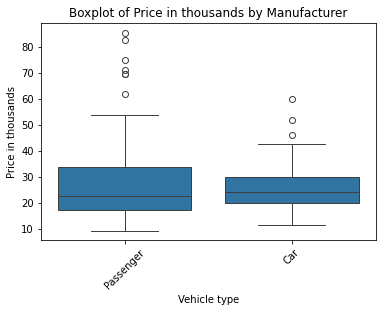

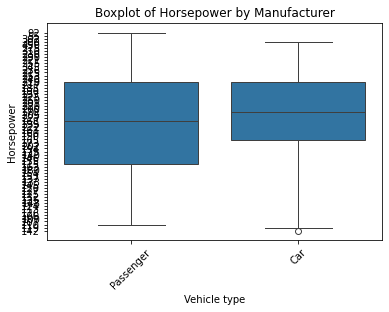

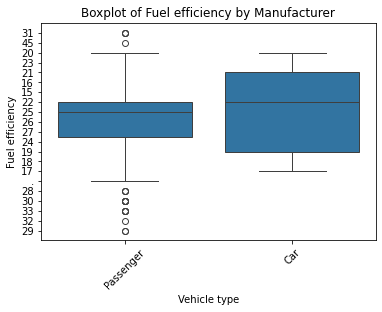

In [52]:
# 22. Boxplot of numerical variables w.r.t. manufacturer
for col in ['Price in thousands', 'Horsepower', 'Fuel efficiency']:
    plt.figure()
    sns.boxplot(x='Vehicle type', y=col, data=df)
    plt.title(f"Boxplot of {col} by Manufacturer")
    plt.xticks(rotation=45)
    plt.show()

In [54]:

# 23. Divide data into input (X) and output (y)
X = df.drop(columns=['Sales in thousands'])
y = df['Sales in thousands']

In [55]:
# 24. Encode categorical variables using LabelEncoder
le = LabelEncoder()
categorical_vars = X.select_dtypes(include='object').columns
for col in categorical_vars:
    X[col] = le.fit_transform(X[col])


In [57]:
# 25. Encode vehicle type using OneHotEncoder
vehicle_type = pd.get_dummies(df['Vehicle type'], drop_first=True)
X = pd.concat([X, vehicle_type], axis=1)


In [58]:
# 26. Split dataset into train and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [59]:
# 27. Apply feature scaling on numerical variables
scaler = StandardScaler()
X_train[numerical_vars.columns] = scaler.fit_transform(X_train[numerical_vars.columns])
X_test[numerical_vars.columns] = scaler.transform(X_test[numerical_vars.columns])

print("\nData preprocessing completed!")


KeyError: "['Sales in thousands'] not in index"